In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
## Load Dataset and Perform EDA

In [6]:
df = pd.read_excel('World_development_mesurment.xlsx')

In [7]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [8]:
(df.isnull().sum()).sum()

11740

In [9]:
df.duplicated().any()

False

In [10]:
### Label Encoding 

In [11]:
le = LabelEncoder()

In [12]:
df['Country_encoded'] = le.fit_transform(df['Country'])

In [13]:
df['Country_encoded']=df['Country_encoded'].astype(float)
df.drop(['Country'],axis=1,inplace=True)

In [14]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN,193.0
2700,0.013,46.4%,NaN,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",175.0,...,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000",198.0
2701,0.015,41.9%,NaN,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",310.0,...,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000",199.0
2702,0.020,61.9%,NaN,144.0,180.0,NaN,"$381,286,223,859",0.046,$593,792.0,...,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000",202.0


In [15]:
columns_to_clean = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound', 'Business Tax Rate']

for column in columns_to_clean:
    df[column] = df[column].str.replace('[$,%]', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [16]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN,193.0
2700,0.013,46.4,NaN,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198.0
2701,0.015,41.9,NaN,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,310.0,...,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020,61.9,NaN,144.0,180.0,NaN,3.812862e+11,0.046,593.0,792.0,...,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0


In [17]:
### Visualization of missing values 

<Axes: >

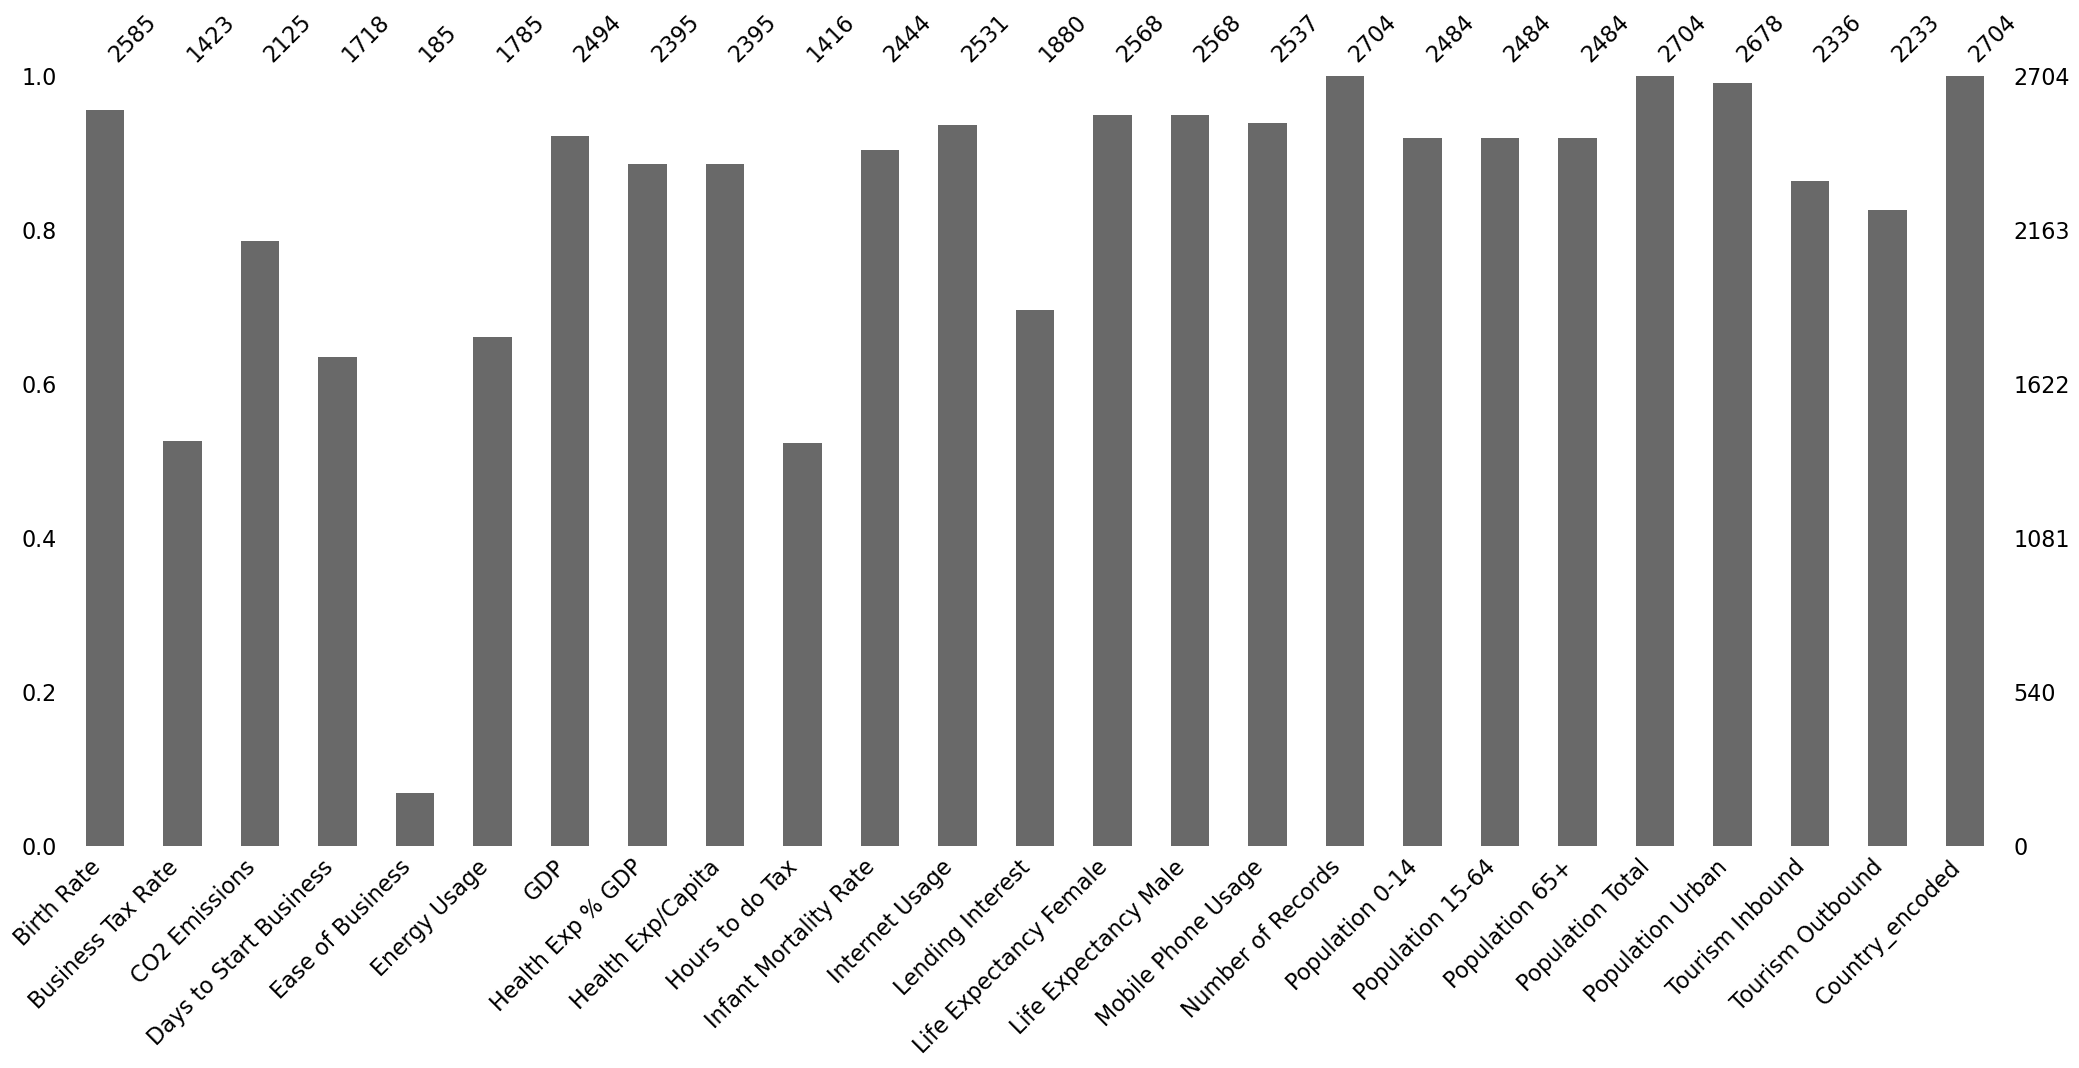

In [18]:
msno.bar(df)

In [19]:
columns_to_fill_mean = ['Business Tax Rate', 'Ease of Business', 'Health Exp % GDP', 'Hours to do Tax', 'Population 0-14','Population Urban']
columns_to_fill_median = ['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'Health Exp/Capita', 'GDP', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Tourism Inbound', 'Tourism Outbound', 'Population 15-64', 'Population 65+']

for column in columns_to_fill_mean:
    df[column] = df[column].fillna(df[column].mean())

for column in columns_to_fill_median:
    df[column] = df[column].fillna(df[column].median())

In [20]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,60.0,302.068503,...,0.0,1,0.342000,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,22.0,302.068503,...,0.0,1,0.476000,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,15.0,302.068503,...,0.0,1,0.454000,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.0,302.068503,...,0.1,1,0.383000,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,12.0,302.068503,...,0.0,1,0.468000,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,193.0,302.068503,...,0.5,1,0.303051,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193.0
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,8895.0,175.000000,...,1.0,1,0.196000,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198.0
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,1308.0,310.000000,...,1.5,1,0.220000,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,593.0,792.000000,...,1.0,1,0.288000,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0


<Axes: >

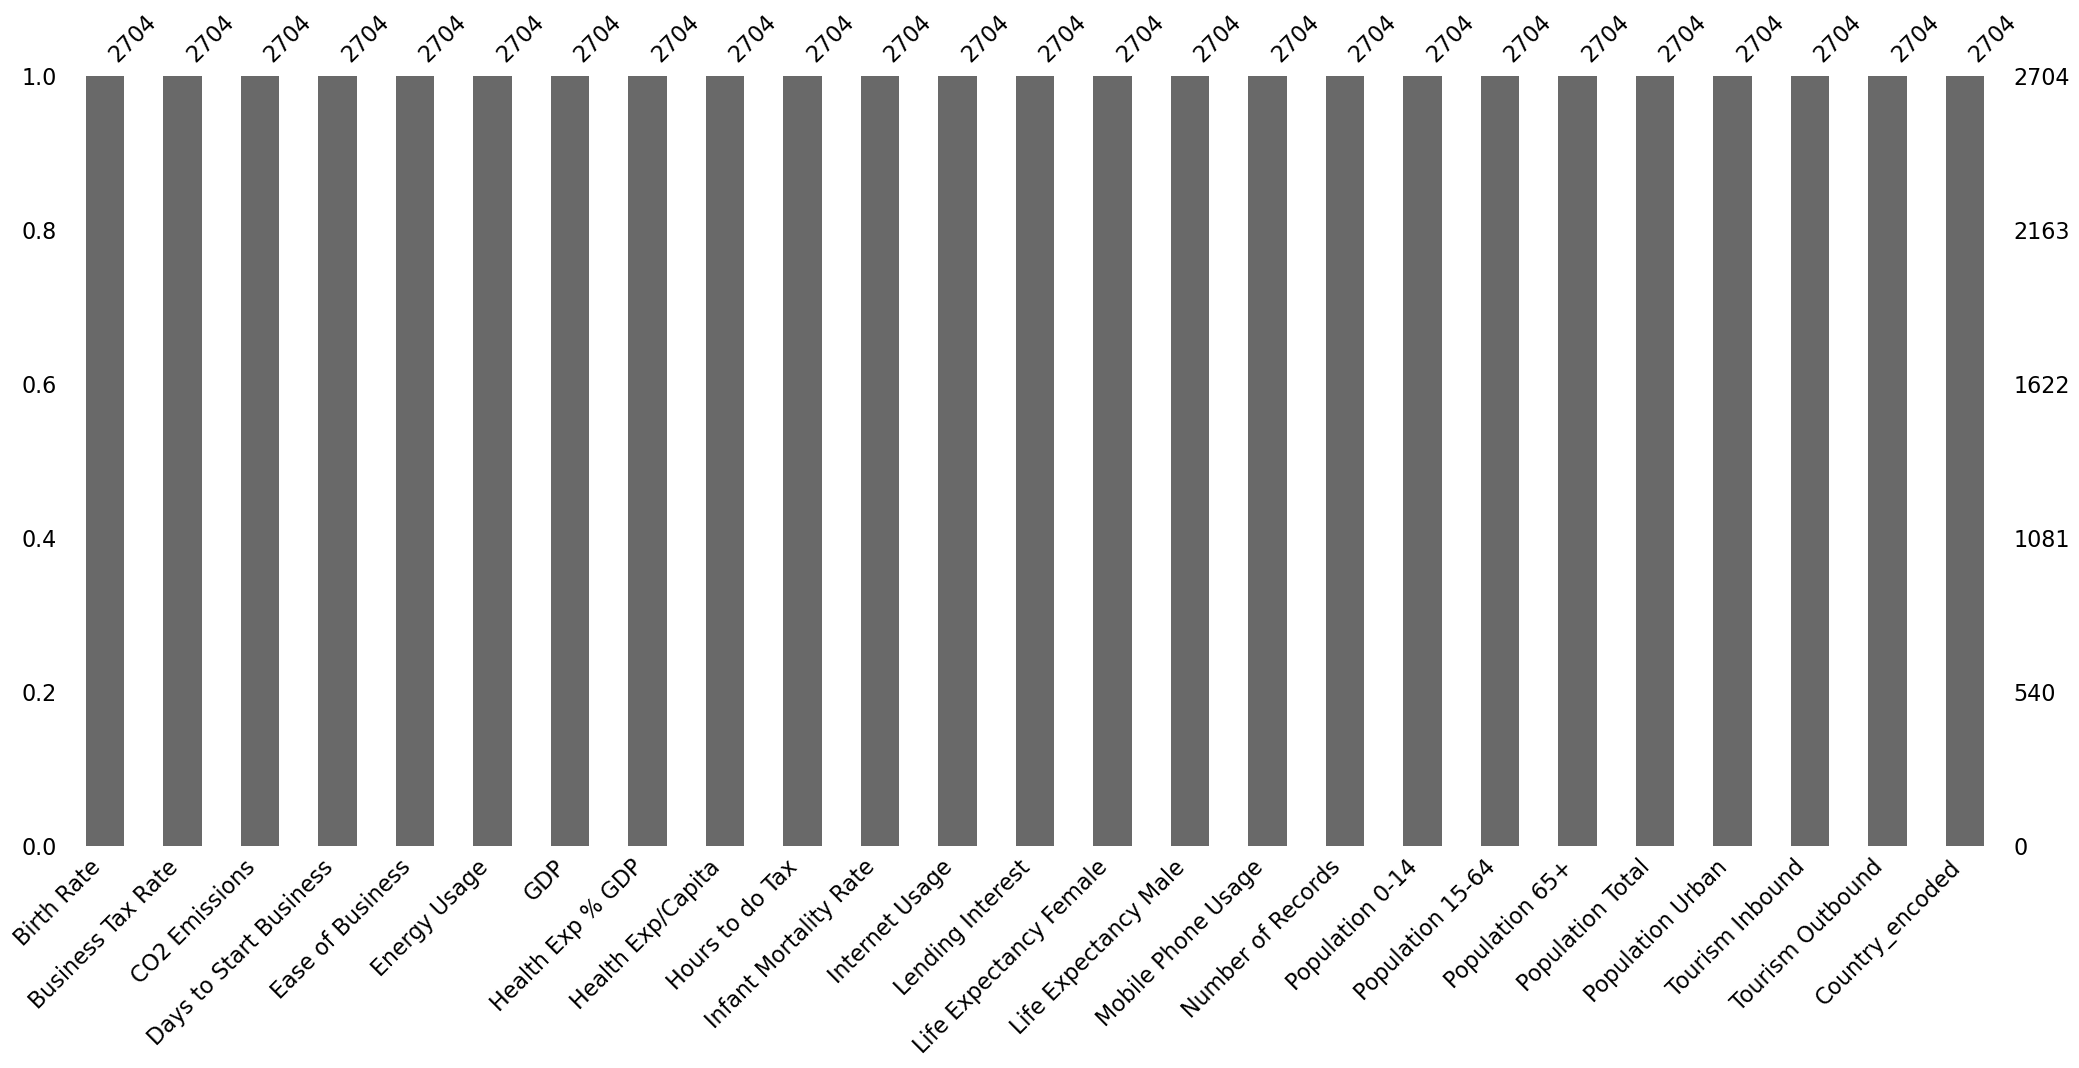

In [21]:
msno.bar(df)

In [22]:
df.drop(columns='Number of Records', inplace=True)

In [23]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,60.0,302.068503,...,67.0,0.0,0.342000,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,22.0,302.068503,...,44.0,0.0,0.476000,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,15.0,302.068503,...,53.0,0.0,0.454000,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.0,302.068503,...,49.0,0.1,0.383000,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,12.0,302.068503,...,49.0,0.0,0.468000,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,193.0,302.068503,...,69.0,0.5,0.303051,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193.0
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,8895.0,175.000000,...,76.0,1.0,0.196000,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,198.0
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,1308.0,310.000000,...,74.0,1.5,0.220000,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,593.0,792.000000,...,72.0,1.0,0.288000,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0


In [24]:
### Outliers

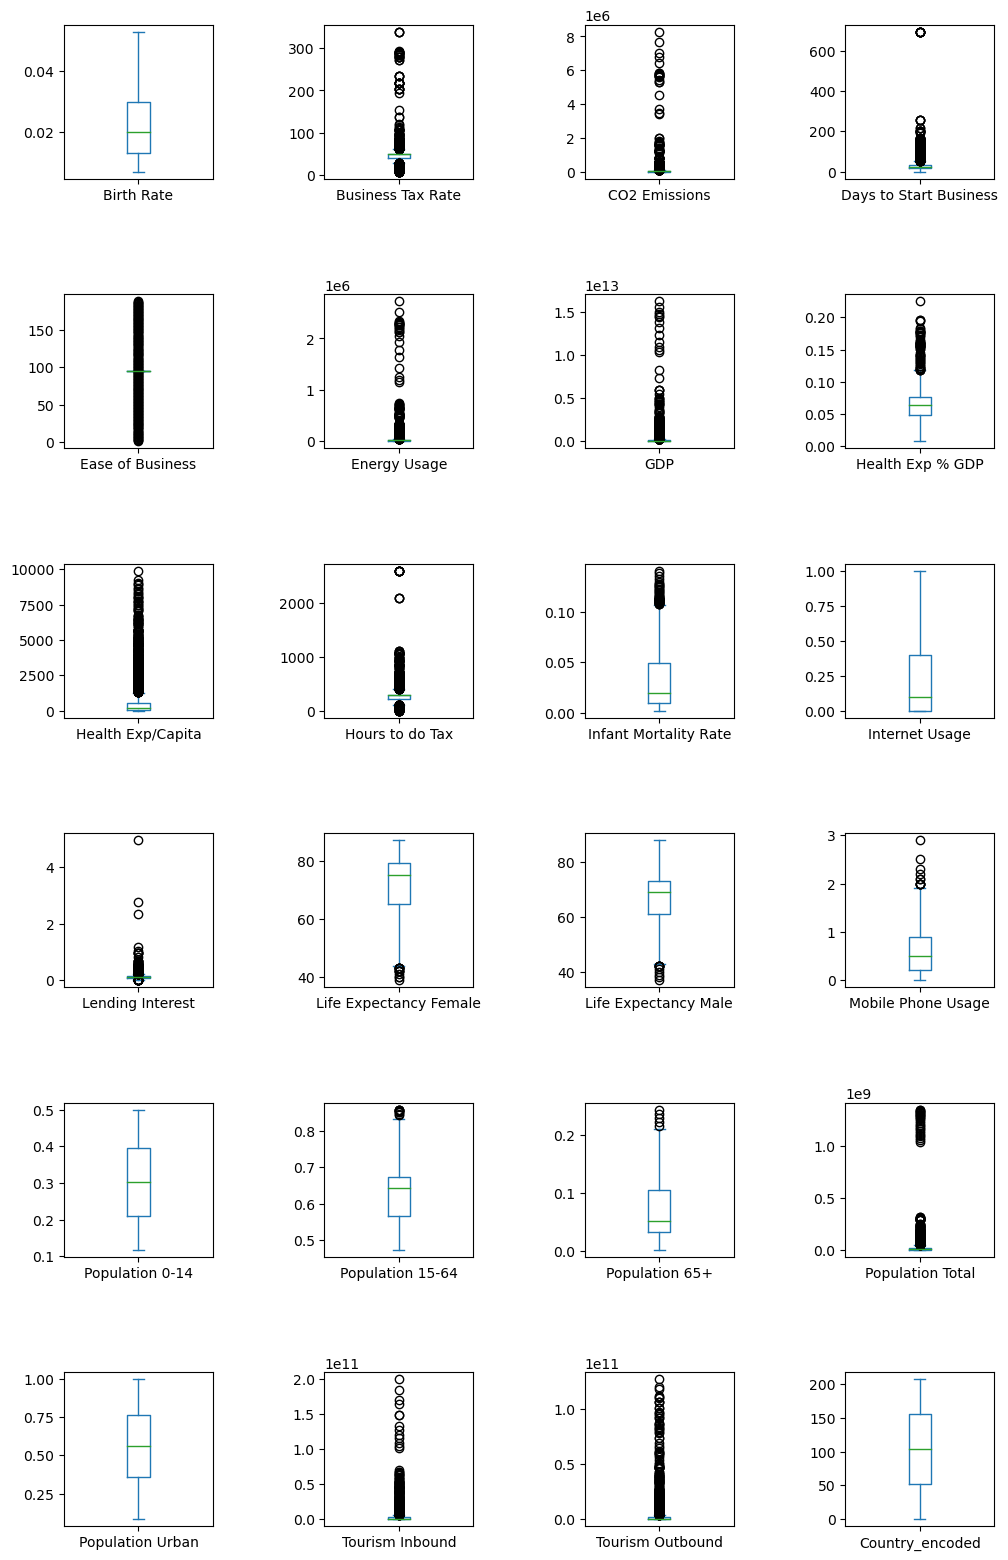

In [25]:
df.plot(kind='box',layout=(7,4), subplots=True,sharey=False,figsize=(12,23))
plt.subplots_adjust(hspace=0.75, wspace=0.75)

In [26]:
### Isolation forest

In [27]:
from sklearn.ensemble import IsolationForest

In [28]:
# Create an instance of the IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination to control the proportion of outliers

# Fit the model to your data
iso_forest.fit(df)

IsolationForest(contamination=0.05)

In [29]:
# Predict outliers (anomalies)
outlier_labels = iso_forest.predict(df)

In [30]:
# Remove outliers
data_no_outliers = df[outlier_labels != -1]
data_no_outliers

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,48.966901,87931.0,26.0,94.875676,26998.0,5.479006e+10,0.03500,60.0,302.068503,...,67.0,0.0,0.342000,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.966901,9542.0,26.0,94.875676,7499.0,9.129595e+09,0.03400,22.0,302.068503,...,44.0,0.0,0.476000,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,5.0
2,0.043,48.966901,1617.0,26.0,94.875676,1983.0,2.359122e+09,0.04300,15.0,302.068503,...,53.0,0.0,0.454000,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027,48.966901,4276.0,26.0,94.875676,1836.0,5.788312e+09,0.04700,152.0,302.068503,...,49.0,0.1,0.383000,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,25.0
4,0.046,48.966901,1041.0,26.0,94.875676,14338.0,2.610959e+09,0.05100,12.0,302.068503,...,49.0,0.0,0.468000,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14338.0,2.343634e+10,0.05400,972.0,210.000000,...,66.0,1.4,0.207000,0.7050,0.088,1337439,0.088,6.885000e+08,4.560000e+08,189.0
2699,0.020,48.966901,8529.0,26.0,94.875676,14338.0,1.507975e+10,0.06417,193.0,302.068503,...,69.0,0.5,0.303051,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,193.0
2701,0.015,41.900000,8529.0,7.0,85.000000,14338.0,5.000435e+10,0.08900,1308.0,310.000000,...,74.0,1.5,0.220000,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,199.0
2702,0.020,61.900000,8529.0,144.0,180.000000,14338.0,3.812862e+11,0.04600,593.0,792.000000,...,72.0,1.0,0.288000,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,202.0


In [31]:
### Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

# Assuming data_no_outliers and df are your dataframes or arrays
# Scale data after removing outliers
scaler_no_outliers = StandardScaler().fit(data_no_outliers)
df_std = scaler_no_outliers.transform(data_no_outliers)

# Scale data without removing outliers
scaler = StandardScaler().fit(df)
std_df = scaler.transform(df)


In [34]:
#Scaling data after removing outliers

df_std = StandardScaler().fit_transform(data_no_outliers)

#Scaling data without removing outliers 

std_df = StandardScaler().fit_transform(df)

In [35]:
df_std

array([[-0.26323502,  0.03841982,  0.34554332, ..., -0.42975489,
        -0.39829618, -1.69145781],
       [ 2.45740171,  0.03841982, -0.32032965, ..., -0.44088527,
        -0.40838768, -1.6415115 ],
       [ 1.82258647,  0.03841982, -0.38764833, ..., -0.43384694,
        -0.42900011, -1.39177998],
       ...,
       [-0.71667448, -0.22590054, -0.32893455, ..., -0.08274906,
        -0.21901098,  1.58834955],
       [-0.26323502,  0.52215114, -0.32893455, ..., -0.29848193,
         0.24777466,  1.63829585],
       [-1.07942604,  0.03841982, -0.32893455, ..., -0.3337554 ,
        -0.34182671,  1.67159339]])

In [36]:
## Principal component analysis (PCA)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca= PCA()

In [39]:
pca_std = pca.fit_transform(df_std)

In [40]:
pca_std

array([[-1.02604941e+00,  2.10403849e-01,  1.48146465e+00, ...,
        -2.88301739e-01,  6.47929712e-02, -3.19703019e-03],
       [-6.27305521e+00,  1.60102581e+00, -1.56713070e+00, ...,
        -7.06957484e-02, -2.06260782e-01,  5.21329548e-03],
       [-4.31396897e+00,  5.49711256e-01, -8.39561683e-01, ...,
        -6.45510203e-02, -1.63129329e-01,  1.02059422e-03],
       ...,
       [ 2.97132649e+00, -1.61147313e+00, -6.51696214e-01, ...,
        -3.62674375e-02,  8.18352311e-02,  4.58619858e-03],
       [ 9.13734887e-01,  4.22928710e-01,  2.34914692e+00, ...,
        -2.33261826e-01, -2.32885503e-02, -4.81735913e-03],
       [ 2.14174406e+00, -1.55417058e+00,  6.83329530e-01, ...,
        -4.15151523e-02,  9.75410059e-02,  5.34065745e-03]])

In [41]:
pca.explained_variance_ratio_

array([3.63897725e-01, 1.37094604e-01, 6.97894171e-02, 5.27298944e-02,
       4.47256639e-02, 4.25540403e-02, 3.89068450e-02, 3.54496770e-02,
       3.40041837e-02, 3.24290722e-02, 2.62330339e-02, 2.53182048e-02,
       2.24134625e-02, 2.00992879e-02, 1.64055724e-02, 9.84180709e-03,
       8.71508239e-03, 7.07534155e-03, 4.13034917e-03, 3.25957467e-03,
       2.22313855e-03, 2.05755542e-03, 6.45096979e-04, 1.37041133e-06])

In [42]:
cvar= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
cvar

array([36.39, 50.1 , 57.08, 62.35, 66.82, 71.08, 74.97, 78.51, 81.91,
       85.15, 87.77, 90.3 , 92.54, 94.55, 96.19, 97.17, 98.04, 98.75,
       99.16, 99.49, 99.71, 99.92, 99.98, 99.98])

Text(0, 0.5, 'Cummulative Varience % ')

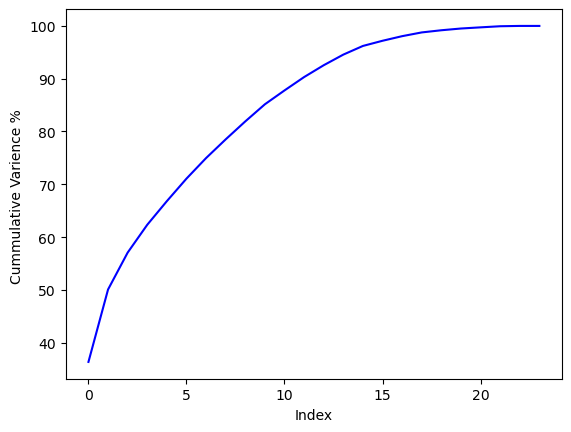

In [43]:
plt.plot(cvar,color = 'blue')
plt.xlabel('Index')
plt.ylabel('Cummulative Varience % ')

In [44]:
data_pca = pca_std[:,:16]

In [46]:
data_pca

array([[-1.02604941,  0.21040385,  1.48146465, ..., -0.51432716,
         0.02656239,  0.05022256],
       [-6.27305521,  1.60102581, -1.5671307 , ..., -0.64353432,
        -0.22574785, -0.24593878],
       [-4.31396897,  0.54971126, -0.83956168, ..., -0.60356719,
        -0.0086429 , -0.26834037],
       ...,
       [ 2.97132649, -1.61147313, -0.65169621, ...,  0.80557611,
         0.72401018, -0.99130068],
       [ 0.91373489,  0.42292871,  2.34914692, ...,  0.05999944,
         0.25400979,  0.798473  ],
       [ 2.14174406, -1.55417058,  0.68332953, ..., -0.43619053,
         0.87618144, -0.8429024 ]])

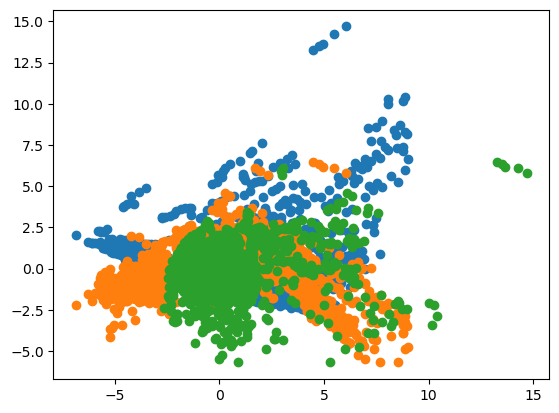

In [47]:
x=pca_std[:,0]
y=pca_std[:,1]
z=pca_std[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)

In [48]:
## K-Means Clustering

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

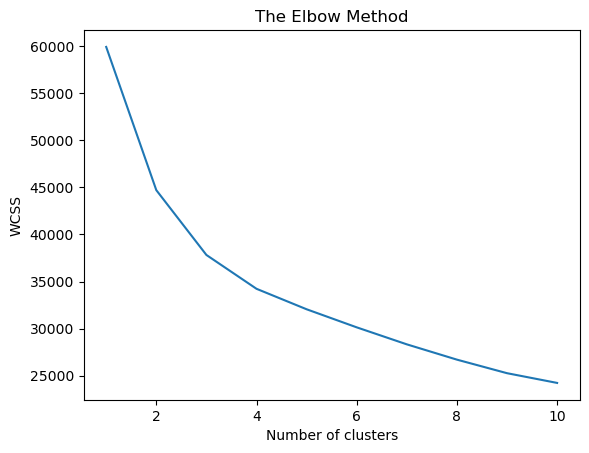

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
from kneed import KneeLocator

In [51]:
kl=KneeLocator(range(1,11),wcss,direction='decreasing',curve='convex')

In [52]:
kl.elbow

3

In [53]:
#### Through Knee Locator we find the n_clusters = 3

In [54]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 33)
y_kmeans = kmeans.fit_predict(data_pca)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


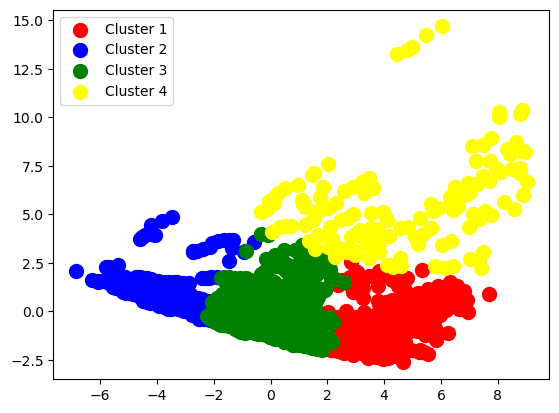

In [55]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.legend()

In [65]:
#### Silhouette Score

In [66]:
s1_kmeans = silhouette_score(data_pca,y_kmeans)
print('Silhouette Score for K-Means clustring :',s1_kmeans)

Silhouette Score for K-Means clustring : 0.20600778271668105


In [70]:
import pandas as pd

# Create an empty DataFrame with specified columns using a list
score = pd.DataFrame(columns=['Model Name', 'Silhouette Score'])
score


,Model Name,Silhouette Score


In [71]:
new_data = {'Model Name': 'K-Means (PCA)', 'Silhouette Score': s1_kmeans}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\2332196565.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008


In [72]:
## Gaussian Mixture Model (GMM)

In [73]:
from sklearn.mixture import GaussianMixture

In [74]:
gmm = GaussianMixture(n_components=4, random_state=33)

In [75]:
gmm.fit(data_pca)

GaussianMixture(n_components=4, random_state=33)

In [76]:
cluster_labels = gmm.predict(data_pca)

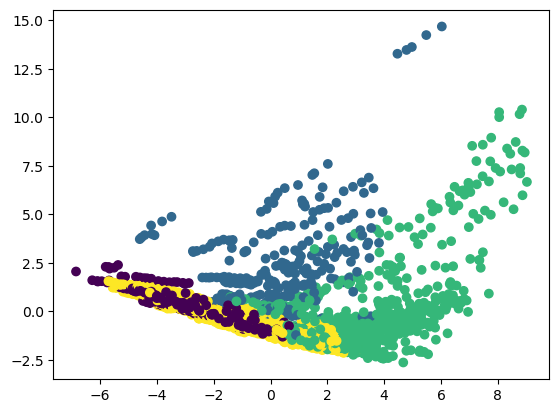

In [77]:
# Visualize the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.show()

In [78]:
#### Silhouette Score

In [79]:
s2_gmm = silhouette_score(data_pca,cluster_labels)
print('Silhouette Score for GMM :',s2_gmm)

Silhouette Score for GMM : 0.14655360414961693


In [80]:
new_data = {'Model Name': 'GMM (PCA)', 'Silhouette Score': s2_gmm}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\215164306.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554


In [81]:
## Hierarchical Clustering

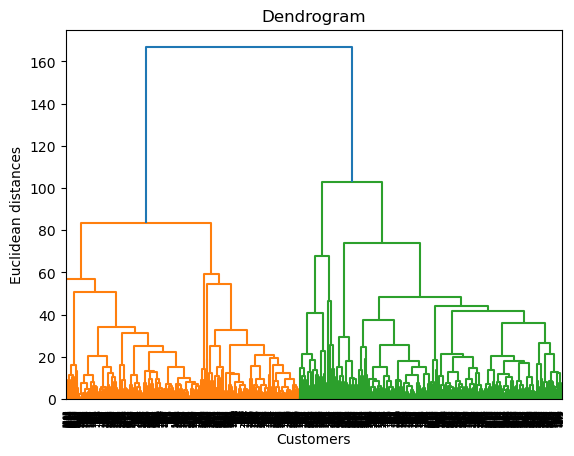

In [82]:
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [83]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


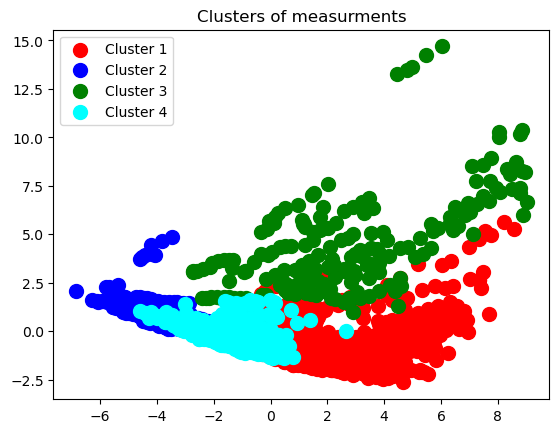

In [84]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [85]:
#### Silhouette Score

In [86]:
s3_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.1484618201147635


In [87]:
new_data = {'Model Name': 'Hierarchial (PCA)', 'Silhouette Score': s3_hierarchy}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\2254003958.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462


In [88]:
## DBSCAN

In [89]:
dbscan = DBSCAN(eps=0.33,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

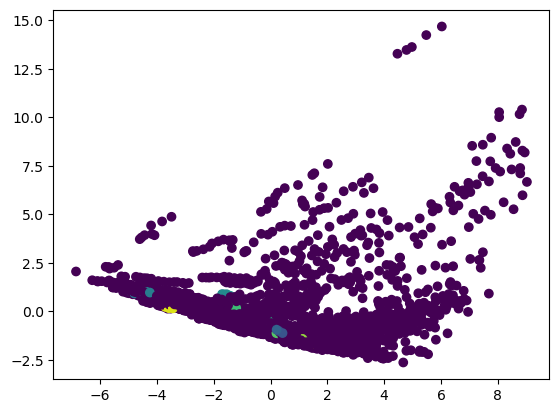

In [90]:
plt.scatter(data_pca[:,0],data_pca[:,1],c=dbscan_labels)
plt.show()

In [91]:
#### Silhouette Score

In [92]:
s4_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s4_dbscan)

Silhouette Score for DBSCAN is: -0.4074842007499748


In [93]:
new_data = {'Model Name': 'DBSCAN (PCA)', 'Silhouette Score': s4_dbscan}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\459272480.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484


In [94]:
## t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [95]:
from sklearn.manifold import TSNE

In [96]:
tsne=TSNE()
data_tsne = tsne.fit_transform(df_std)

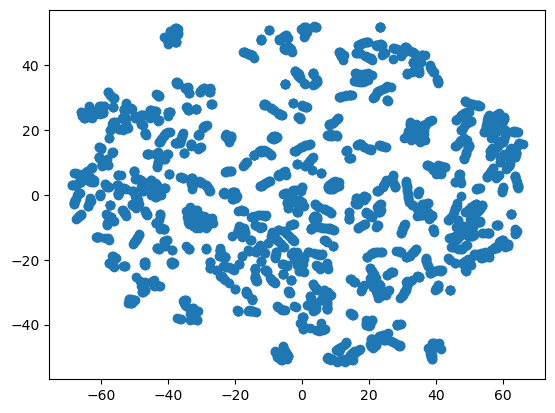

In [97]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [98]:
## K-Means Clustering

In [99]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data_tsne)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [100]:
y=pd.DataFrame(kmeans.labels_)
y

,0
0,3
1,1
2,1
3,1
4,1
...,...
2563,0
2564,3
2565,2
2566,1


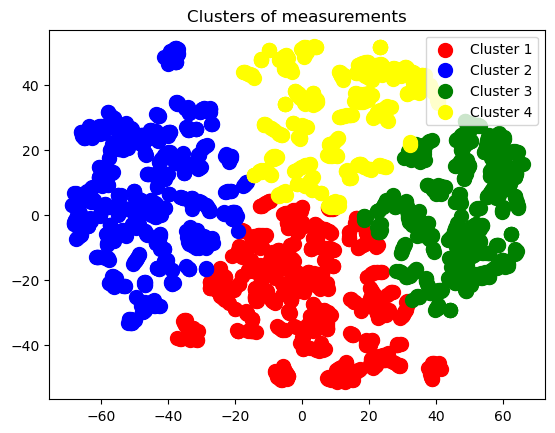

In [101]:
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_kmeans == 2, 0], data_tsne[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_kmeans == 3, 0], data_tsne[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(data_tsne[y_kmeans == 4, 0], data_tsne[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
#plt.scatter(data_tsne[y_kmeans == 5, 0], data_tsne[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [102]:
#### Silhouette Score

In [103]:
s5_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s5_kmeans)

Silhouette Score for K-means clustring : 0.42520607


In [104]:
new_data = {'Model Name': 'K-Means (t-SNE)', 'Silhouette Score': s5_kmeans}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\3102369336.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206


In [105]:
## Hierarchical Clustering

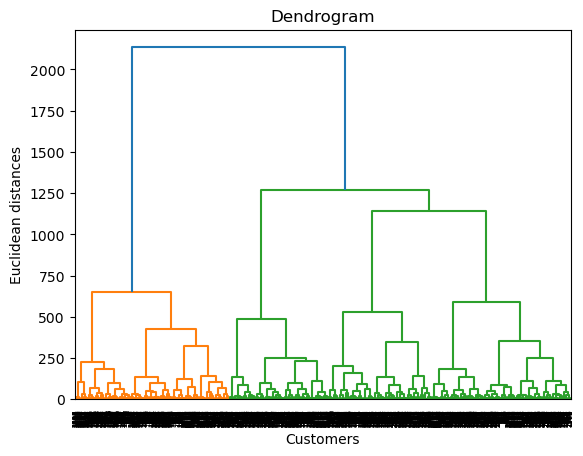

In [106]:
dendrogram = sch.dendrogram(sch.linkage(data_tsne, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [107]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


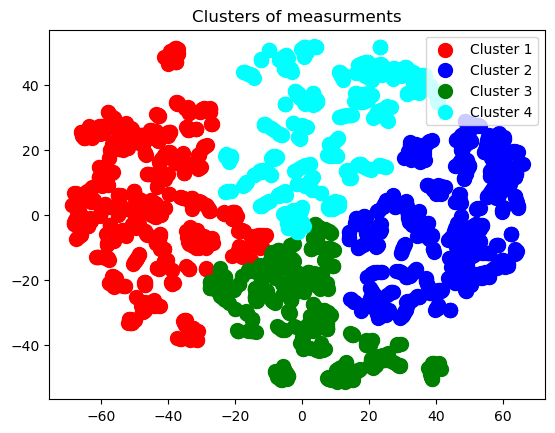

In [108]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(data_tsne[y_hc == 4, 0], data_tsne[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
#plt.scatter(data_tsne[y_hc == 5, 0], data_tsne[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [109]:
#### Silhouette Score

In [110]:
s6_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s6_hierarchy)

Silhouette Score for Hierarchy clustring : 0.3850646


In [111]:
new_data = {'Model Name': 'Hierarchial (t-SNE)', 'Silhouette Score': s6_hierarchy}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\1421231552.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065


In [112]:
## DBSCAN

In [113]:
dbscan = DBSCAN(eps=.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_tsne)

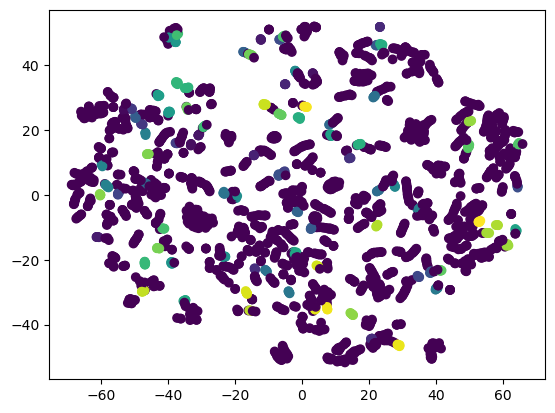

In [114]:
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=dbscan_labels)
plt.show()

In [115]:
#### Silhouette Score

In [116]:
s7_dbscan = silhouette_score(data_tsne, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s7_dbscan)

Silhouette Score for DBSCAN is: -0.5535991


In [117]:
new_data = {'Model Name': 'DBSCAN (t-SNE)', 'Silhouette Score': s7_dbscan}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\371545657.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065
6,DBSCAN (t-SNE),-0.553599


In [118]:
## Gaussian Mixture Model (GMM)

In [119]:
gmm = GaussianMixture(n_components=4, random_state=0)

In [120]:
gmm.fit(data_tsne)

GaussianMixture(n_components=4, random_state=0)

In [121]:
cluster_labels = gmm.predict(data_tsne)

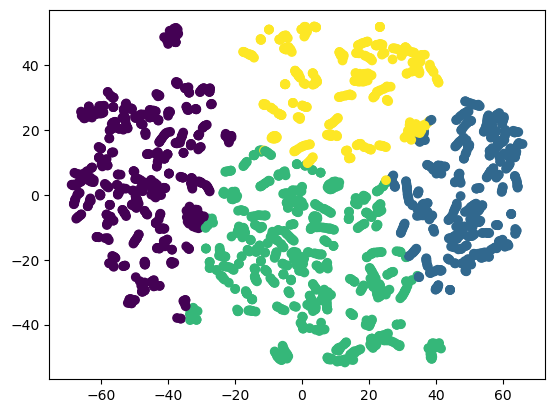

In [122]:
# Visualize the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.show()

In [123]:
#### Silhouette Score

In [124]:
s8_gmm = silhouette_score(data_tsne,cluster_labels)
print('Silhouette Score for GMM :',s8_gmm)

Silhouette Score for GMM : 0.41505694


In [125]:
new_data = {'Model Name': 'GMM (t-SNE)', 'Silhouette Score': s8_gmm}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\3848802331.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065
6,DBSCAN (t-SNE),-0.553599
7,GMM (t-SNE),0.415057


In [126]:
### Robust Scaler

In [127]:
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
robust_scaler.fit(data_no_outliers)
df_scaled=robust_scaler.transform(data_no_outliers)

In [128]:
tsne=TSNE()
data_tsne = tsne.fit_transform(df_scaled)

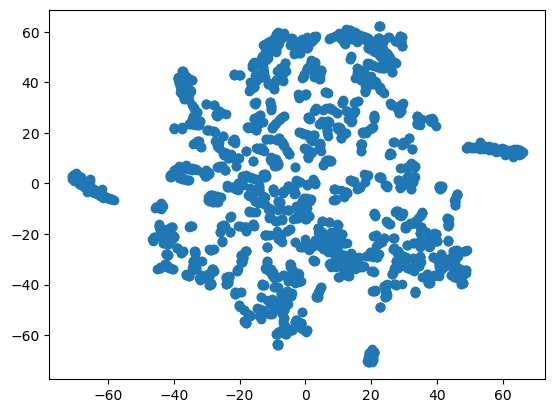

In [129]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

In [130]:
## K-Means

In [131]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data_tsne)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


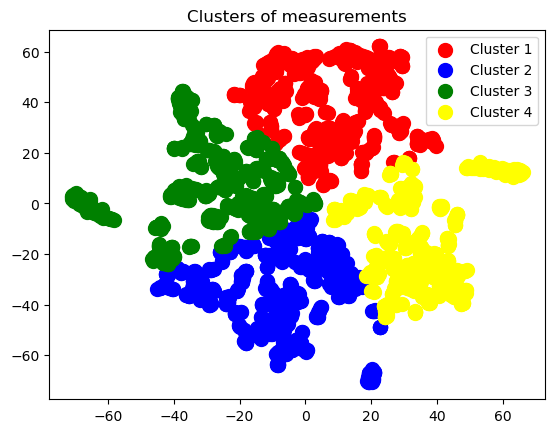

In [132]:
plt.scatter(data_tsne[y_kmeans == 0, 0], data_tsne[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans == 1, 0], data_tsne[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_kmeans == 2, 0], data_tsne[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_kmeans == 3, 0], data_tsne[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
#plt.scatter(data_tsne[y_kmeans == 4, 0], data_tsne[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
#plt.scatter(data_tsne[y_kmeans == 5, 0], data_tsne[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [133]:
sc = silhouette_score(data_tsne,y_kmeans)
print('Silhouette Score :',sc)

Silhouette Score : 0.3868318


In [134]:
new_data = {'Model Name': 'K-Means (t-SNE,RobustScaler)', 'Silhouette Score': sc}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\3249771068.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065
6,DBSCAN (t-SNE),-0.553599
7,GMM (t-SNE),0.415057
8,"K-Means (t-SNE,RobustScaler)",0.386832


In [135]:
## Hierarchical Clustering

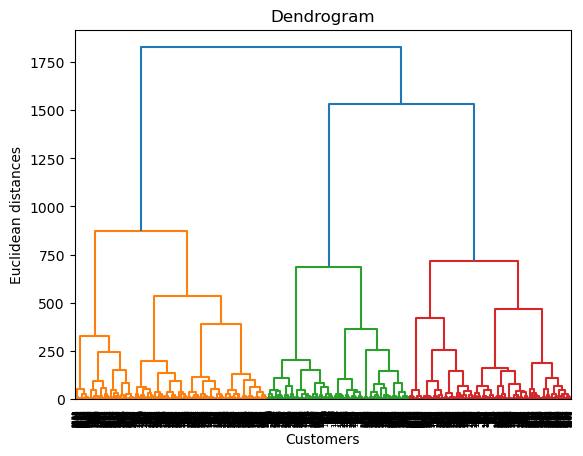

In [136]:
dendrogram = sch.dendrogram(sch.linkage(data_tsne, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [137]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


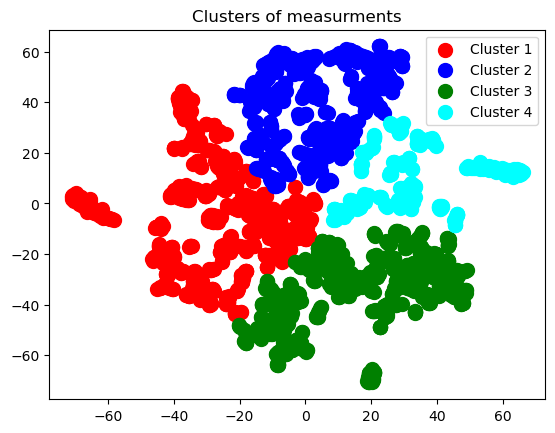

In [138]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(data_tsne[y_hc == 4, 0], data_tsne[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
#plt.scatter(data_tsne[y_hc == 5, 0], data_tsne[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [139]:
sc1 = silhouette_score(data_tsne,y_hc)
print('Silhouette Score :',sc1)

Silhouette Score : 0.3498972


In [140]:
new_data = {'Model Name': 'Hierarchial (t-SNE,RobustScaler)', 'Silhouette Score': sc1}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\865396588.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065
6,DBSCAN (t-SNE),-0.553599
7,GMM (t-SNE),0.415057
8,"K-Means (t-SNE,RobustScaler)",0.386832
9,"Hierarchial (t-SNE,RobustScaler)",0.349897


In [141]:
## DBSCAN

In [142]:
dbscan = DBSCAN(eps=.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_tsne)

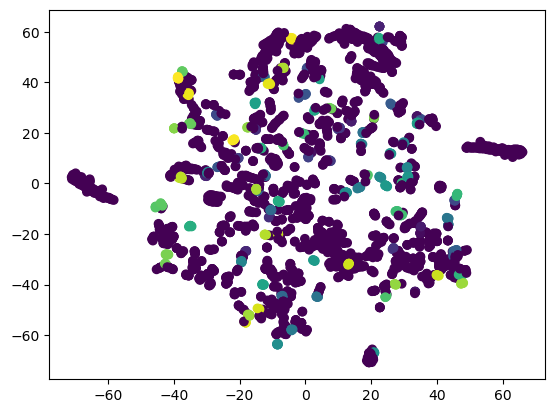

In [143]:
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=dbscan_labels)
plt.show()

In [144]:
sc2 = silhouette_score(data_tsne,cluster_labels)
print('Silhouette Score :',sc2)

Silhouette Score : 0.1481535


In [145]:
new_data = {'Model Name': 'DBSCAN (t-SNE,RobustScaler)', 'Silhouette Score': sc2}
score = score.append(new_data, ignore_index=True)
score

C:\Users\abhis\AppData\Local\Temp\ipykernel_13352\2967159059.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_data, ignore_index=True)


,Model Name,Silhouette Score
0,K-Means (PCA),0.206008
1,GMM (PCA),0.146554
2,Hierarchial (PCA),0.148462
3,DBSCAN (PCA),-0.407484
4,K-Means (t-SNE),0.425206
5,Hierarchial (t-SNE),0.385065
6,DBSCAN (t-SNE),-0.553599
7,GMM (t-SNE),0.415057
8,"K-Means (t-SNE,RobustScaler)",0.386832
9,"Hierarchial (t-SNE,RobustScaler)",0.349897


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
### Split the dataset into features (X) and the target (y)

In [148]:
X = data_no_outliers  # Features
y  # Target

,0
0,3
1,1
2,1
3,1
4,1
...,...
2563,0
2564,3
2565,2
2566,1


In [149]:
### Split the dataset into training and testing sets

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
## Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [154]:
# Step 3: Predict Class Labels

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [155]:
#### Testing data Accuracy

In [156]:
a1 = accuracy_score(y_test,y_pred)
a1

0.38132295719844356

In [157]:
#### Training data accuracy

In [158]:
accuracy_score(y_train,y_pred_train)

0.37828627069133397

In [159]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 6,  2, 71, 71],
       [15, 58,  2, 77],
       [ 1,  2, 64, 57],
       [ 0, 14,  6, 68]], dtype=int64)

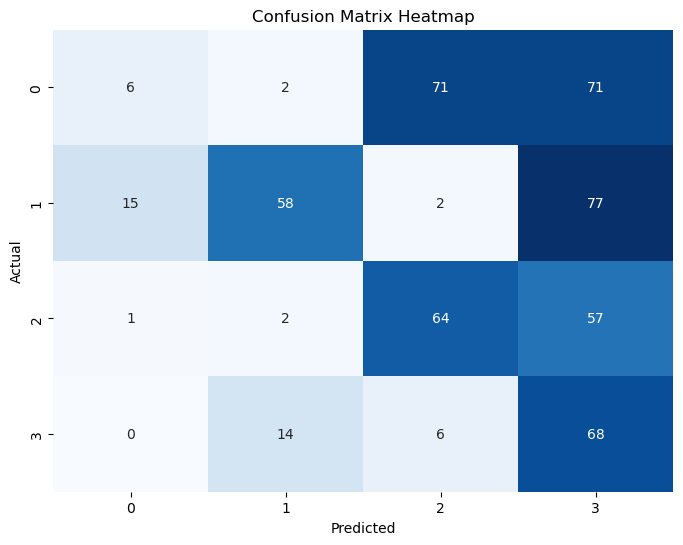

In [160]:
labels = ['0', '1', '2', '3']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.04      0.07       150
           1       0.76      0.38      0.51       152
           2       0.45      0.52      0.48       124
           3       0.25      0.77      0.38        88

    accuracy                           0.38       514
   macro avg       0.43      0.43      0.36       514
weighted avg       0.46      0.38      0.35       514



In [162]:
## Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [165]:
clf.fit(X_train, y_train)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [166]:
# Step 3: Predict Class Labels

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [167]:
#### Testing data Accuracy

In [168]:
a2 = accuracy_score(y_test,y_pred)
a2

0.9727626459143969

In [169]:
accuracy_score(y_train,y_pred_train)

1.0

In [170]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[146,   2,   2,   0],
       [  3, 148,   0,   1],
       [  2,   0, 121,   1],
       [  1,   2,   0,  85]], dtype=int64)

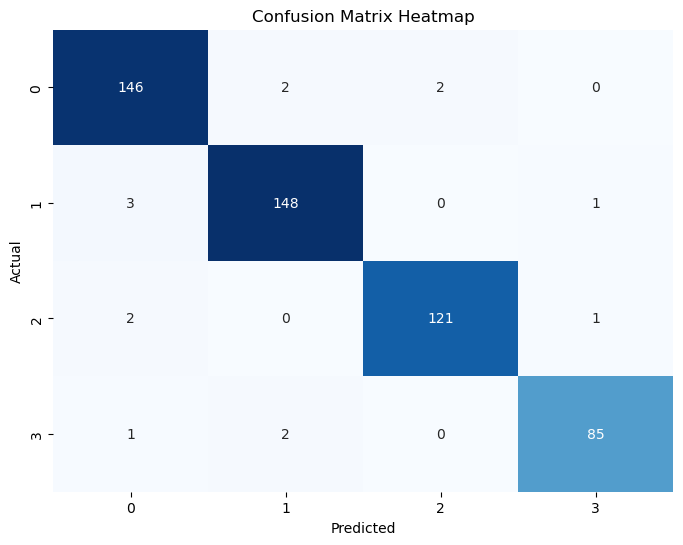

In [171]:
labels = ['0', '1', '2', '3']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.97      0.97       152
           2       0.98      0.98      0.98       124
           3       0.98      0.97      0.97        88

    accuracy                           0.97       514
   macro avg       0.97      0.97      0.97       514
weighted avg       0.97      0.97      0.97       514



In [173]:
## Decision Tree Classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
clf = DecisionTreeClassifier(random_state=42)

In [176]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [177]:
# Step 3: Predict Class Labels
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [178]:
#### Testing data Accuracy

In [179]:
a3 = accuracy_score(y_test,y_pred)
a3

0.9630350194552529

In [180]:
#### Training data accuracy

In [181]:
accuracy_score(y_train,y_pred_train)

1.0

In [182]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[144,   4,   0,   2],
       [  3, 149,   0,   0],
       [  2,   0, 120,   2],
       [  4,   2,   0,  82]], dtype=int64)

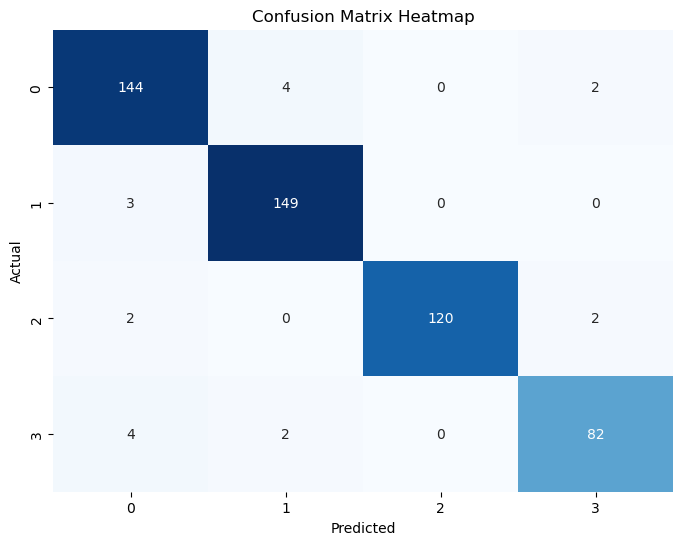

In [183]:
labels = ['0', '1', '2', '3']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.98      0.97       152
           2       1.00      0.97      0.98       124
           3       0.95      0.93      0.94        88

    accuracy                           0.96       514
   macro avg       0.96      0.96      0.96       514
weighted avg       0.96      0.96      0.96       514



In [185]:
## Neural Network

In [186]:
from sklearn.neural_network import MLPClassifier

In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [188]:
clf_nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf_nn.fit(X_train_scaled, y_train)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [189]:
y_pred_nn = clf_nn.predict(X_test_scaled)
y_pred_train = clf_nn.predict(X_train_scaled)

In [190]:
#### Testing data Accuracy

In [191]:
a4= accuracy_score(y_test,y_pred_nn)
a4

0.9922178988326849

In [192]:
#### Training data accuracy

In [193]:
accuracy_score(y_train,y_pred_train)

0.998539435248296

In [194]:
cm = confusion_matrix(y_test,y_pred_nn)
cm

array([[148,   1,   1,   0],
       [  0, 151,   1,   0],
       [  0,   0, 124,   0],
       [  1,   0,   0,  87]], dtype=int64)

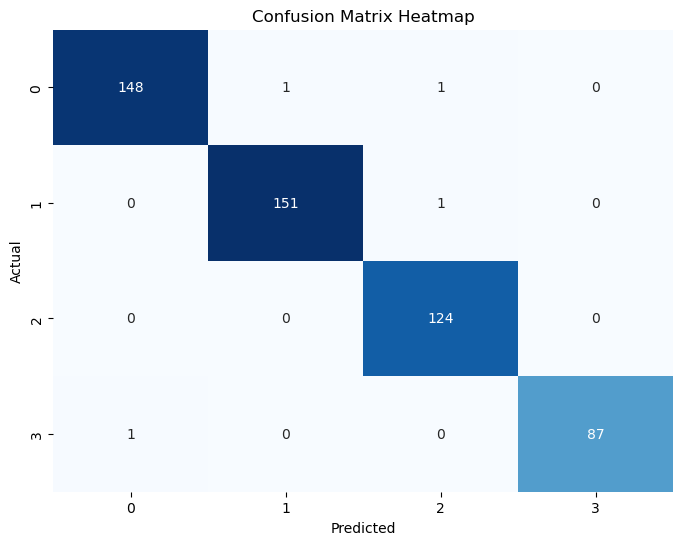

In [195]:
labels = ['0', '1', '2', '3']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.96      0.98      0.97       152
           2       1.00      0.97      0.98       124
           3       0.95      0.93      0.94        88

    accuracy                           0.96       514
   macro avg       0.96      0.96      0.96       514
weighted avg       0.96      0.96      0.96       514



In [197]:
acc_score= pd.DataFrame({'Model Name':['Logistic Regression','Random forests','Decision trees','Neural Networks'],
                   'Accuracy Score':[a1,a2,a3,a4,]})
acc_score

,Model Name,Accuracy Score
0,Logistic Regression,0.381323
1,Random forests,0.972763
2,Decision trees,0.963035
3,Neural Networks,0.992218
